<a href="https://colab.research.google.com/github/EduardoJM/data-science-quarentenadados/blob/master/QuarentenaDados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4: Estatísticas no ENEM 2018

In [2]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
uri = 'https://raw.githubusercontent.com/EduardoJM/data-science-quarentenadados/master/datasets/MICRODADOS_ENEM_2018_SAMPLE_43278.csv'
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,1,2207702.0,Parnaíba,22.0,PI,1,5,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,1,3557105.0,Votuporanga,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,160.0,120.0,120.0,160.0,120.0,680.0,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,1,2506301.0,Guarabira,25.0,PB,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,1,3514403.0,Dracena,35.0,SP,2,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,100.0,120.0,100.0,80.0,0.0,400.0,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,1,3550308.0,São Paulo,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
# muda a precisão da exibição de números quebrados (float) para duas casas decimais
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
# to show all columns names
pd.set_option('display.max_columns', None)
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026',
       'Q027'],
      dtype='object', length=137)

In [6]:
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2211001,Teresina,22,PI,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3557105,Votuporanga,35,SP,1.00,1.00,1.00,1.00,448.00,454.00,457.00,460.00,523.10,671.30,661.60,738.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2506301,Guarabira,25,PB,1.00,1.00,1.00,1.00,447.00,451.00,455.00,459.00,409.20,531.70,389.00,438.10,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",D

In [7]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,0.02,0.03,0.03,0.04,0.03,0.01,0.01,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [8]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_notas].dropna()
dados_notas.columns = ['ciencias_natureza', 'ciencias_humanas', 'linguagem_codigos', 'matematica', 'redacao']
dados_notas.head()

,ciencias_natureza,ciencias_humanas,linguagem_codigos,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [9]:
corr = dados_notas.corr()
corr

,ciencias_natureza,ciencias_humanas,linguagem_codigos,matematica,redacao
ciencias_natureza,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigos,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


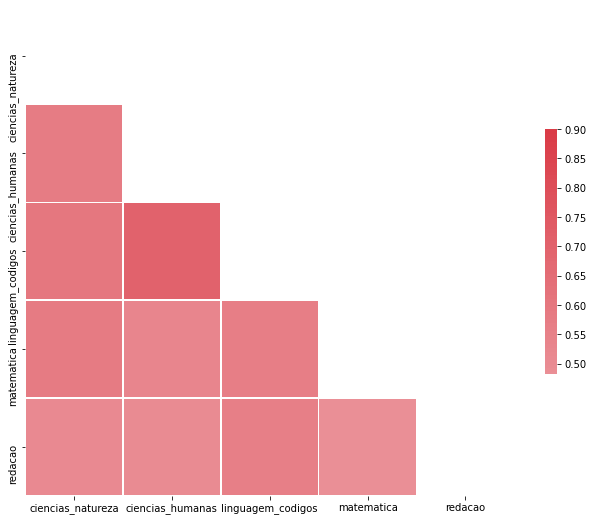

In [10]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A visualização do heatmap não foi boa

A execução do `sns.pairplot(dados_notas, kind='reg')`tá demorando devido a regressão linear que ele calcula para cada um dos gráficos. Existem parâmetros extras para diminuir a amostragem da regressão.

In [0]:
# sns.pairplot(dados_notas, kind='reg')

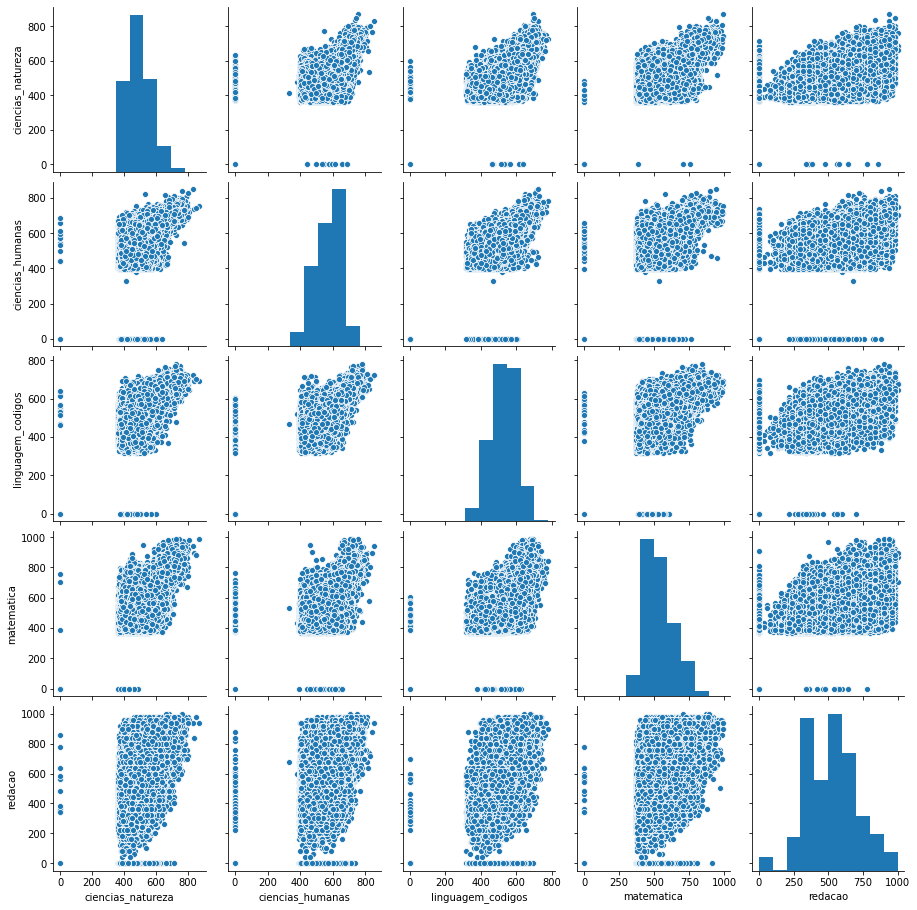

In [12]:
sns.pairplot(dados_notas)

## Desafio 1

Se a pessoa não teve presença, preencher a nota da pessoa com algum número (nota 0?).

**Minha observação:** não faz sentido preencher a nota de pessoas que tiveram presença (que estiverem com NaN) com 0 e, ainda assim, dropar as notas de pessoas sem presença (que estiverem com NaN). Visto isso, desdobrei esse desafio em algumas curiosidades que tive:

1 - Analisar se, dentro das pessoas com presença, não desclassificadas, e com a redação 'sem problemas', houveram, ainda, notas com NaN.

2 - Preencher as notas NaN com 0 e, posteriormente, verificar se houveram presentes, não desclassificados, com notas zero.

Minha abordagem aos dois problemas acima estão, nas duas [sub]subseções próximas

### Dentro das pessoas com presença, houveram NaN?

In [13]:
dados_p_presenca = dados[['TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN']]
dados_p_presenca

,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_PRESENCA_MT,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN
0,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
1,1.00,680.00,523.10,671.30,661.60,738.00,1.00,1.00,1.00,1.00
2,1.00,600.00,409.20,531.70,389.00,438.10,1.00,1.00,1.00,1.00
3,1.00,400.00,452.30,505.50,448.50,544.90,1.00,1.00,1.00,1.00
4,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
137839,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
137840,1.00,380.00,382.40,534.20,468.10,576.40,1.00,1.00,1.00,1.00
137841,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
137842,1.00,300.00,452.70,509.30,527.70,591.40,1.00,1.00,1.00,1.00


In [14]:
dados_p_presenca['TP_STATUS_REDACAO'].unique()

array([nan,  1.,  6.,  8.,  4.,  3.,  7.,  9.,  2.])

In [0]:
# apenas presentes e que a redação esteja sem problemas
apenas_presentes = dados_p_presenca.query('TP_STATUS_REDACAO == 1 and TP_PRESENCA_MT == 1 and TP_PRESENCA_LC == 1 and TP_PRESENCA_CH == 1 and TP_PRESENCA_CN == 1')

In [16]:
len(apenas_presentes) == len(apenas_presentes.dropna())

True

Como resultado da verificação se existe algum NaN que não seja dos não presentes, conclui-se que  não. Todos os NaN são de fato das pessoas que não estiveram presentes ou que, por algum motivo, zeraram alguns dos itens (desclassificação ou falta)

### Houveram presentes com 0?

In [17]:
dados_p_presenca

,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_PRESENCA_MT,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN
0,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
1,1.00,680.00,523.10,671.30,661.60,738.00,1.00,1.00,1.00,1.00
2,1.00,600.00,409.20,531.70,389.00,438.10,1.00,1.00,1.00,1.00
3,1.00,400.00,452.30,505.50,448.50,544.90,1.00,1.00,1.00,1.00
4,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
137839,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
137840,1.00,380.00,382.40,534.20,468.10,576.40,1.00,1.00,1.00,1.00
137841,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00
137842,1.00,300.00,452.70,509.30,527.70,591.40,1.00,1.00,1.00,1.00


In [0]:
# remove os NaN dos STATUS\PRESENCA visto que não faz sentido
# a PRESENCA ou STATUS da redação estar preenchida com NaN
dados_presenca_normalizados = dados_p_presenca.dropna(subset=['TP_STATUS_REDACAO', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN'])

In [19]:
# mostra os NaN para NU_NOTA_CN
dados_presenca_normalizados.query('NU_NOTA_CN != NU_NOTA_CN')

,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_PRESENCA_MT,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN
25,1.00,360.00,nan,493.30,480.70,nan,0.00,1.00,1.00,0.00
54,1.00,340.00,nan,549.70,524.00,nan,0.00,1.00,1.00,0.00
74,1.00,340.00,nan,462.80,448.50,nan,0.00,1.00,1.00,0.00
82,1.00,540.00,nan,620.50,568.30,nan,0.00,1.00,1.00,0.00
88,1.00,460.00,nan,618.00,562.80,nan,0.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...
137677,1.00,520.00,nan,572.40,472.50,nan,0.00,1.00,1.00,0.00
137753,1.00,600.00,nan,663.10,652.70,nan,0.00,1.00,1.00,0.00
137777,1.00,560.00,nan,637.30,549.90,nan,0.00,1.00,1.00,0.00
137815,1.00,520.00,nan,482.80,484.20,nan,0.00,1.00,1.00,0.00


In [20]:
def normalise_row(row, col):
    if np.isnan(row[col]):
        return 0
    return row[col]
def normalize_col(col):
    dados_presenca_normalizados[f'{col}_NORMALIZED'] = dados_presenca_normalizados.apply(
        lambda row : normalise_row(row, col), axis=1)
normalize_col('NU_NOTA_CN')
normalize_col('NU_NOTA_CH')
normalize_col('NU_NOTA_LC')
normalize_col('NU_NOTA_MT')
normalize_col('NU_NOTA_REDACAO')
# mostra os NaN na coluna NU_NOTA_CN_NORMALIZED
dados_presenca_normalizados.query('NU_NOTA_CN_NORMALIZED != NU_NOTA_CN_NORMALIZED')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_PRESENCA_MT,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN,NU_NOTA_CN_NORMALIZED,NU_NOTA_CH_NORMALIZED,NU_NOTA_LC_NORMALIZED,NU_NOTA_MT_NORMALIZED,NU_NOTA_REDACAO_NORMALIZED


In [21]:
# ciencias da natureza
len(dados_presenca_normalizados.query('TP_PRESENCA_CN == 1 and NU_NOTA_CN_NORMALIZED == 0'))

14

Para ciências da natureza, isso responde a pergunta, houveram 14 pessoas que tinham presença e que tiraram zero.

In [22]:
# ciencias humanas
len(dados_presenca_normalizados.query('TP_PRESENCA_CH == 1 and NU_NOTA_CH_NORMALIZED == 0'))

189

Para ciências humanas, houveram 189 pessoas que tinham presença e que tiraram zero.

In [23]:
len(dados_presenca_normalizados.query('TP_PRESENCA_LC == 1 and NU_NOTA_LC_NORMALIZED == 0'))

87

Para linguagens e códigos, houveram 87 pessoas presentes com zero.

In [24]:
len(dados_presenca_normalizados.query('TP_PRESENCA_MT == 1 and NU_NOTA_MT_NORMALIZED == 0'))

22

Para matemática e suas tecnologias, 22 pessoas estiveram presentes e tiraram zero.

In [25]:
len(dados_presenca_normalizados.query('TP_STATUS_REDACAO == 1 and NU_NOTA_REDACAO_NORMALIZED == 0'))

0

Para redação esse número é zero, mas não faz sentido utilizar `TP_STATUS_REDACAO` para presença, visto que `TP_STATUS_REDACAO=1` indica que a redação não teve problemas, ou seja, foi escrita, com tamanho minimo, seguindo todas as regras.

## Desafio 2

Deixar a matriz de correlação mais "usável".

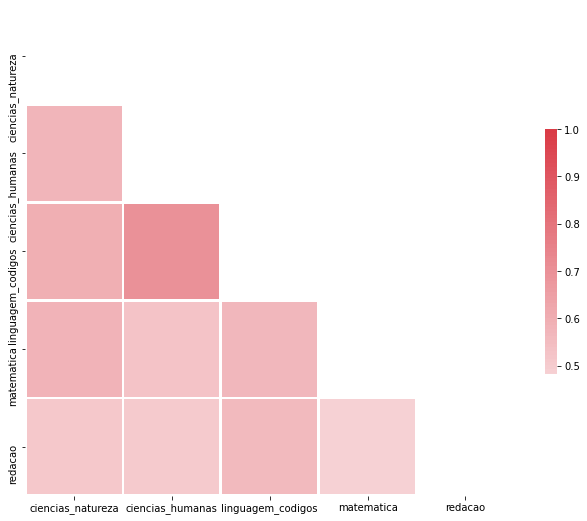

In [26]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, sep=100, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=1.8, cbar_kws={"shrink": .5})

### Conclusão

A minha opinião, verificada através da alteração de valores da plotagem, é que como estamos fazendo o plot da matriz de correlação e os dados da tabela de correlação apresentados pelo `.corr` estão quase todos entre `0.5` e `0.9` (duas exceções únicas, em `0.48`, próximo de `0.5`) a matriz não vai ficar muito mais bem visível que isso.

Isso talvez seja importante pelo fato de que, talvez, nem sempre, os *datasets* utilizados vão ser tão bons a ponto de que, qualquer visualização que se queira fazer, dê certo.

## Desafio 3

Pairplot dos acertos de cada categoria (CN, CH, MT, LC) e nota da redação.

**Detalhe**: Aqui é necessário, primeiro, analisar a quantidade de acertos através do gabarito.

In [0]:
dados_gabaritos = dados[['TX_RESPOSTAS_LC', 'TX_GABARITO_LC', 'TX_RESPOSTAS_CN', 'TX_GABARITO_CN', 'TX_RESPOSTAS_CH', 'TX_GABARITO_CH', 'TX_RESPOSTAS_MT', 'TX_GABARITO_MT', 'NU_NOTA_REDACAO']].dropna()

In [0]:
# como os gabaritos de cada prova tem dimensões diferentes,
# utilizarei array's convencionais aqui
def makeZeros(size):
    arr = []
    for i in range(0, size):
        arr.append(0)
    return arr
questoes_LC = len(dados_gabaritos['TX_RESPOSTAS_LC'][1])
questoes_CN = len(dados_gabaritos['TX_RESPOSTAS_CN'][1])
questoes_CH = len(dados_gabaritos['TX_RESPOSTAS_CH'][1])
questoes_MT = len(dados_gabaritos['TX_RESPOSTAS_MT'][1])
questoes_acertos = {
    "LC": makeZeros(questoes_LC),
    "CN": makeZeros(questoes_CN),
    "CH": makeZeros(questoes_CH),
    "MT": makeZeros(questoes_MT)
}
questoes_erros = {
    "LC": makeZeros(questoes_LC),
    "CN": makeZeros(questoes_CN),
    "CH": makeZeros(questoes_CH),
    "MT": makeZeros(questoes_MT)
}

In [29]:
def count_acertos(row, id):
    a = row[f'TX_RESPOSTAS_{id}']
    b = row[f'TX_GABARITO_{id}']
    if len(a) != len(b):
        return np.nan
    num = 0
    for i in range(0, len(a)):
        if a[i] == b[i]:
            num += 1
            questoes_acertos[id][i] += 1
        else:
            questoes_erros[id][i] += 1
    return num

dados_gabaritos['acertos_LC'] = dados_gabaritos.apply (lambda row: count_acertos(row, 'LC'), axis=1)
dados_gabaritos['acertos_CN'] = dados_gabaritos.apply (lambda row: count_acertos(row, 'CN'), axis=1)
dados_gabaritos['acertos_CH'] = dados_gabaritos.apply (lambda row: count_acertos(row, 'CH'), axis=1)
dados_gabaritos['acertos_MT'] = dados_gabaritos.apply (lambda row: count_acertos(row, 'MT'), axis=1)

dados_acertos = dados_gabaritos[['acertos_LC', 'acertos_CN', 'acertos_CH', 'acertos_MT', 'NU_NOTA_REDACAO']]
dados_acertos

,acertos_LC,acertos_CN,acertos_CH,acertos_MT,NU_NOTA_REDACAO
1,33,11,27,22,680.00
2,8,8,9,6,600.00
3,11,7,10,10,400.00
6,15,11,9,8,560.00
8,15,8,12,13,660.00
...,...,...,...,...,...
137835,15,12,15,12,520.00
137836,14,6,12,11,580.00
137838,16,14,17,9,820.00
137840,13,7,11,13,380.00


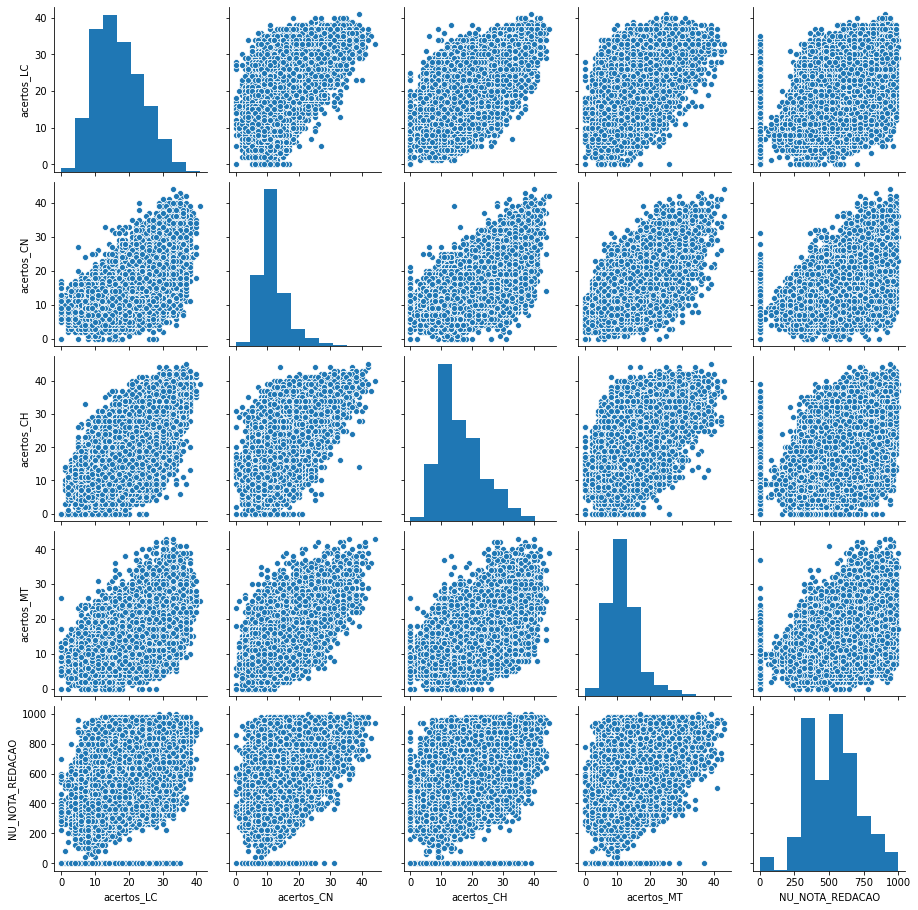

In [30]:
sns.pairplot(dados_acertos)

## Desafio 4

Remover todas as notas 0 da tabela `dados_notas`.

In [31]:
len(dados_notas)

97270

In [32]:
# metodo (talvez gambiarra hahaha) de substituir 0 por nan e utilizar o dropna
notas_sem_zeros = dados_notas.replace(0, np.nan).dropna()
notas_sem_zeros

,ciencias_natureza,ciencias_humanas,linguagem_codigos,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


## Desafio 5

Procurar quais questões tiveram mais erros (e mais acertos?)

**Observação**: O desafio foi parcialmente resolvido no Desafio 3, porque já executavamos funções que teriamos que reexecutar aqui, portanto foi preferivel adicioná-las ao código lá e não aqui.

In [0]:
def get_larges(arr, n):
    ind = []
    val = []
    for i in range(0, n):
        ind.append(-1)
        val.append(-1)
    for i in range(0, len(arr)):
        for j in range(0, n):
            if arr[i] > val[j]:
                val[j] = arr[i]
                ind[j] = i
                break
    return ind, val

### Mais Acertos

In [0]:
mais_acertos_LC, mais_acertos_qtde_LC = get_larges(questoes_acertos['LC'], 10)
mais_acertos_MT, mais_acertos_qtde_MT = get_larges(questoes_acertos['MT'], 10)
mais_acertos_CN, mais_acertos_qtde_CN = get_larges(questoes_acertos['CN'], 10)
mais_acertos_CH, mais_acertos_qtde_CH = get_larges(questoes_acertos['CH'], 10)

In [0]:
acertos_qtd = pd.DataFrame({
    "MAIS_ACERTOS_LC": mais_acertos_LC,
    "QTDE_ACERTOS_LC": mais_acertos_qtde_LC,
    "MAIS_ACERTOS_MT": mais_acertos_MT,
    "QTDE_ACERTOS_MT": mais_acertos_qtde_MT,
    "MAIS_ACERTOS_CN": mais_acertos_CN,
    "QTDE_ACERTOS_CN": mais_acertos_qtde_CN,
    "MAIS_ACERTOS_CH": mais_acertos_CH,
    "QTDE_ACERTOS_CH": mais_acertos_qtde_CH
})

In [36]:
acertos_qtd

,MAIS_ACERTOS_LC,QTDE_ACERTOS_LC,MAIS_ACERTOS_MT,QTDE_ACERTOS_MT,MAIS_ACERTOS_CN,QTDE_ACERTOS_CN,MAIS_ACERTOS_CH,QTDE_ACERTOS_CH
0,31,47223,10,40843,18,35388,30,44085
1,26,45961,16,38685,26,33605,38,42816
2,17,44330,23,35792,22,31853,28,38995
3,23,43096,33,34252,28,31339,35,38965
4,25,42858,36,31589,41,29478,33,36131
5,43,37979,41,26951,35,28493,37,35378
6,36,37472,15,24013,38,27803,27,35288
7,49,37127,39,23678,44,27696,42,34845
8,40,34681,43,23374,40,25177,44,33102
9,44,31037,37,22753,42,24773,40,25654


### Mais Erros

In [0]:
mais_erros_LC, mais_erros_qtde_LC = get_larges(questoes_erros['LC'], 10)
mais_erros_MT, mais_erros_qtde_MT = get_larges(questoes_erros['MT'], 10)
mais_erros_CN, mais_erros_qtde_CN = get_larges(questoes_erros['CN'], 10)
mais_erros_CH, mais_erros_qtde_CH = get_larges(questoes_erros['CH'], 10)

In [0]:
erros_qtd = pd.DataFrame({
    "MAIS_ERROS_LC": mais_erros_LC,
    "QTDE_ERROS_LC": mais_erros_qtde_LC,
    "MAIS_ERROS_MT": mais_erros_MT,
    "QTDE_ERROS_MT": mais_erros_qtde_MT,
    "MAIS_ERROS_CN": mais_erros_CN,
    "QTDE_ERROS_CN": mais_erros_qtde_CN,
    "MAIS_ERROS_CH": mais_erros_CH,
    "QTDE_ERROS_CH": mais_erros_qtde_CH
})

In [39]:
erros_qtd

,MAIS_ERROS_LC,QTDE_ERROS_LC,MAIS_ERROS_MT,QTDE_ERROS_MT,MAIS_ERROS_CN,QTDE_ERROS_CN,MAIS_ERROS_CH,QTDE_ERROS_CH
0,3,77141,44,81893,17,81151,40,71616
1,9,77099,27,78794,43,80481,21,70784
2,18,77041,42,77959,29,76902,23,70580
3,19,72018,38,75854,31,76156,29,69397
4,33,71342,40,75220,33,74743,36,65613
5,42,71056,43,73896,37,73094,43,65346
6,48,70364,31,72380,42,72497,44,64168
7,40,62589,35,71350,44,69574,42,62425
8,37,61295,41,70319,-1,-1,35,58305
9,39,60344,-1,-1,-1,-1,38,54454


# Aula 5: Modelo de Regressão e Machine Learning

In [40]:
x = dados_notas[['ciencias_natureza', 'ciencias_humanas', 'matematica', 'redacao']]
x.head()

,ciencias_natureza,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


## Separando os conjuntos pra treino e teste

In [41]:
y = dados_notas['linguagem_codigos']
y

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigos, Length: 97270, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [43]:
x_treino.head()

,ciencias_natureza,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


## LinearSVR (Linear Support Vector Regression)

In [44]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [45]:
predicoes_notas_LC = modelo.predict(x_teste)
predicoes_notas_LC[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

In [46]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigos, dtype: float64

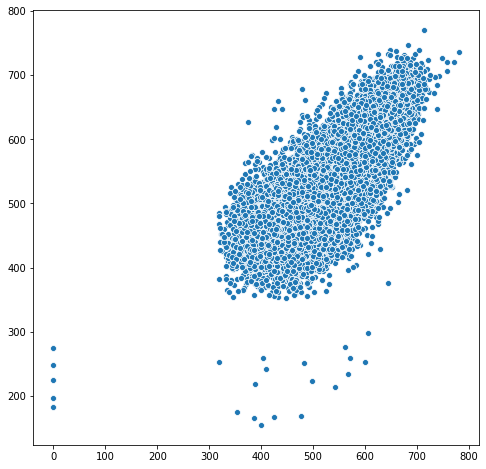

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_LC)

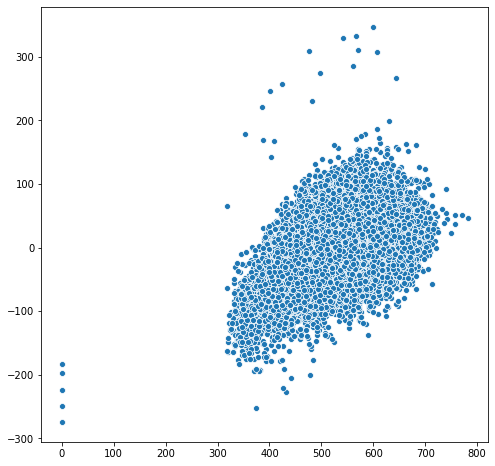

In [48]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_LC)

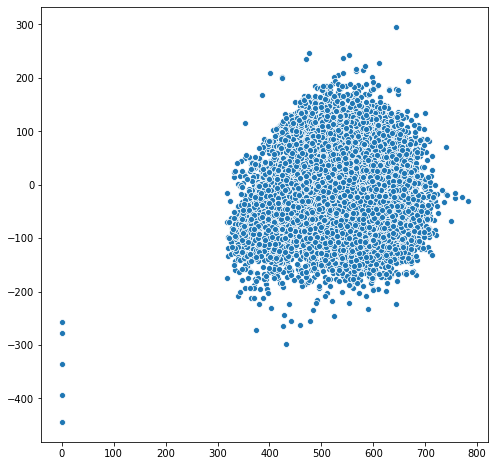

In [49]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))

## DecisionTreeRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

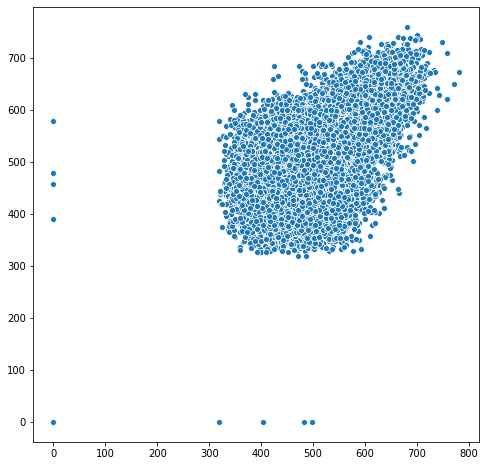

In [51]:
predicoes_notas_LC = modelo.predict(x_teste)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_LC)

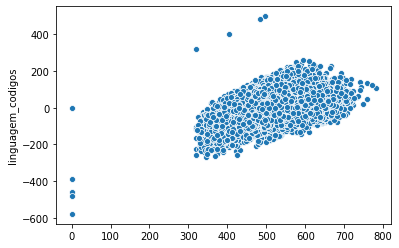

In [52]:
# plotar erro
sns.scatterplot(x=y_teste.values, y=y_teste - predicoes_notas_LC)

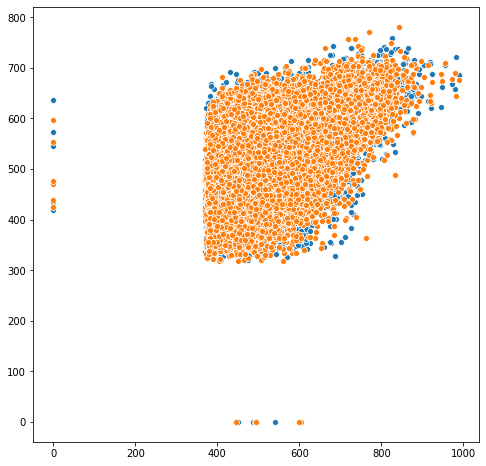

In [53]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_LC)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, predicoes_notas_LC)

4160.601726293281

In [55]:
from sklearn.dummy import DummyRegressor

# media como dummy

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.479089212121

**Observação Importante**: Durante a aula, os professores deram a entender que o modelo `DecisionTreeRegressor` tinha se saído melhor que o `DummyRegressor` com a média, o que me parece errado visto que o erro quadrado médio (ou erro médio quadrado?) (`mean_squared_error`) do modelo com `DecisionTreeRegressor` foi de `4160.6017` enquanto que o erro quadrado médio do modelo com `DummyRegressor` com a média foi `5137.4791`, ambos os valores arredondados pra cada casa. Quanto maior o erro quadrado médio, mais ruim suas medidas estão, portanto, o `DummyRegressor` com a média tem resultados melhor que o `DecisionTreeRegressor`.

In [56]:
# mediana como dummy
modelo_dummy = DummyRegressor('median')
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5160.291908051649

## Desafio 1

Plotar no eixo X a média(média?) das 4 notas ao invés de uma só.

**Observação**: Vez ou outra, como matemático, vejo os professores falando sobre medidas estatísticas tais como a *média* e *mediana* que, para a minha visão, não fazem sentido, por exemplo, nesse desafio (plotar no eixo X a média das 4 notas ao invés de uma só), onde estamos plotando, na verdade, a nota original no eixo X e a nota calculada pelos modelos de regressão no eixo Y e não médias.

Deste modo, pode ser que queriam dizer para plotar as demais notas e a nota cálculada pelo modelo de regressão, como feito acima com matemática.

### Ciências da Natureza

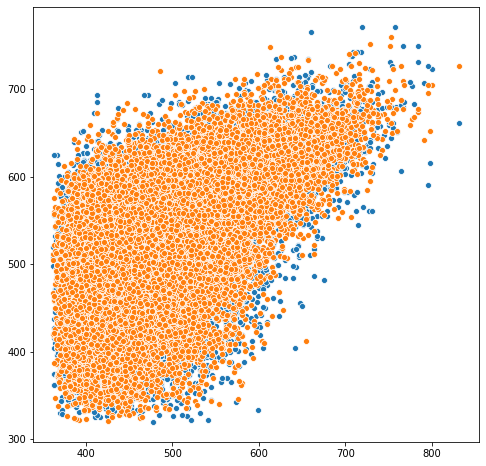

In [65]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=x_teste['ciencias_natureza'].values, y=predicoes_notas_LC)
sns.scatterplot(x=x_teste['ciencias_natureza'].values, y=y_teste.values)

### Ciências Humanas

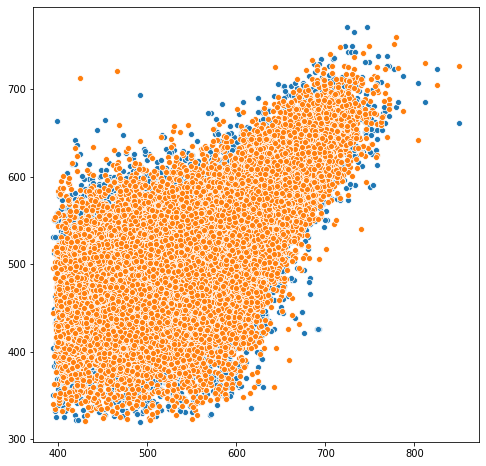

In [66]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=x_teste['ciencias_humanas'].values, y=predicoes_notas_LC)
sns.scatterplot(x=x_teste['ciencias_humanas'].values, y=y_teste.values)

### Redação

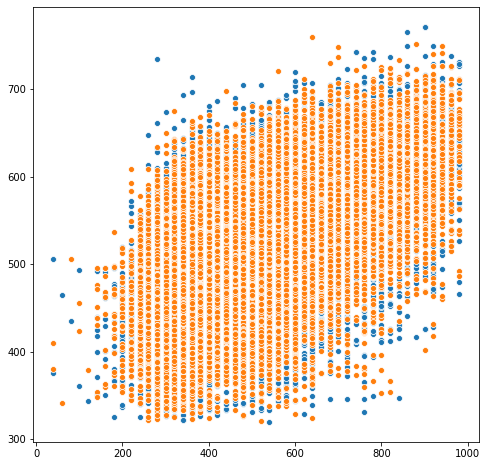

In [67]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=x_teste['redacao'].values, y=predicoes_notas_LC)
sns.scatterplot(x=x_teste['redacao'].values, y=y_teste.values)

## Desafio 3

Fazer o mesmo procedimento com as notas sem os zeros.

### LinearSVR

In [57]:
x = notas_sem_zeros[['ciencias_natureza', 'ciencias_humanas', 'matematica', 'redacao']]
y = notas_sem_zeros['linguagem_codigos']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=326784)

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

predicoes_notas_LC = modelo.predict(x_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


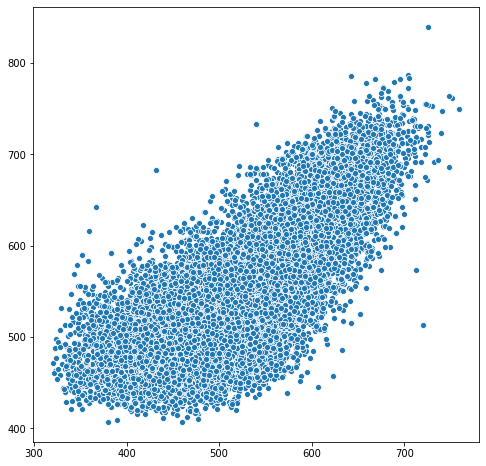

In [58]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_LC)

In [59]:
mean_squared_error(y_teste, predicoes_notas_LC)

2842.8329157872827

In [60]:
# dummy com a média
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5050.365606299117

### DecisionTreeRegressor

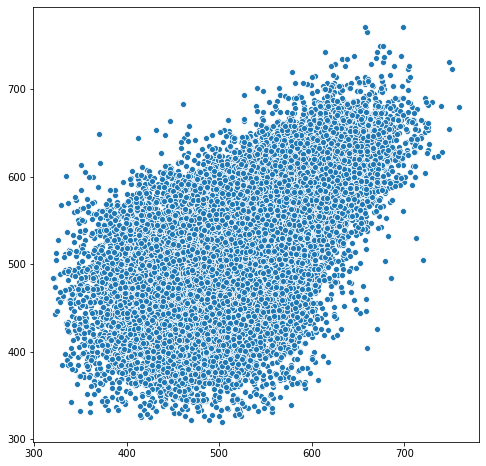

In [61]:
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

predicoes_notas_LC = modelo.predict(x_teste)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_LC)

In [62]:
mean_squared_error(y_teste, predicoes_notas_LC)

4045.199641536392

O modelo `LinearSVR` realmente apresentou resultados bem melhores com relação ao erro médio quadrado (`2484.8937`) com os dados sem as notas 0. O modelo `DecisionTreeRegressor` por sua vez, teve melhora muito pequena, se comparado ao `LinearSVR`. Além disso, o `DummyRegressor` com a média, que antes tinha alcançado erro médio quadrado menor que os modelos treinados, teve erro significativamente maior que o `LinearSVR`, `5050.3656`.

## Desafio 4

Calcule as métricas de erro que utilizamos também no conjunto de treino e veja o que acontece, comparado com o conjunto de testes.

In [71]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

predicoes_notas_LC = modelo.predict(x_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [72]:
mean_squared_error(y_treino, predicoes_notas_LC)

17933.43536214066

**Concluindo**: usando o predict no x_treino e calculando o erro no conjunto encontrado e no y_treino, original, o erro médio quadrático gira em torno de 17k, um erro absurdo pra dizer que esse modelo é minimamente utilizável.